## TASK 1 - CORPUS

In [1]:
import pandas as pd
import numpy as np

In [2]:
#encodng the data into pandas.DataFrame objects

url_a_test = 'Data/arguments-test.tsv'
df_a_test = pd.read_csv(url_a_test, sep='\t')

url_a_training = 'Data/arguments-training.tsv'
df_a_training = pd.read_csv(url_a_training, sep='\t')

url_a_validation = 'Data/arguments-validation.tsv'
df_a_validation = pd.read_csv(url_a_validation, sep='\t')

url_l_test = 'Data/labels-test.tsv'
df_l_test = pd.read_csv(url_l_test, sep='\t')

url_l_training = 'Data/labels-training.tsv'
df_l_training = pd.read_csv(url_l_training, sep='\t')

url_l_validation = 'Data/labels-validation.tsv'
df_l_validation = pd.read_csv(url_l_validation, sep='\t')


In [3]:
#merge argument dataframes with label dataframes
df_test = pd.merge(df_a_test, df_l_test, on='Argument ID')

df_training = pd.merge(df_a_training, df_l_training, on='Argument ID')

df_validation = pd.merge(df_a_validation, df_l_validation, on='Argument ID')

In [4]:

def merge_and_drop_columns(df):
    # Merge level 2 annotations to level 3 categories
    df['Openess to change'] = df[['Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism']].any(axis=1).astype(int)
    df['Self-enhancement'] = df[['Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face']].any(axis=1).astype(int)
    df['Conservation'] = df[['Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility']].any(axis=1).astype(int)
    df['Self-transcendence'] = df[['Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity']].any(axis=1).astype(int)
    
    # Drop unuseful columns
    columns_to_drop = ['Argument ID', 'Self-direction: thought', 'Self-direction: action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: dominance', 'Power: resources', 'Face', 'Security: personal', 'Security: societal', 'Tradition', 'Conformity: rules', 'Conformity: interpersonal', 'Humility', 'Benevolence: caring', 'Benevolence: dependability', 'Universalism: concern', 'Universalism: nature', 'Universalism: tolerance', 'Universalism: objectivity']
    df = df.drop(columns=columns_to_drop)
    
    return df

# Applicare la funzione ai DataFrame
df_test = merge_and_drop_columns(df_test)
df_training = merge_and_drop_columns(df_training)
df_validation = merge_and_drop_columns(df_validation)

df_validation.head()

,Conclusion,Stance,Premise,Openess to change,Self-enhancement,Conservation,Self-transcendence
0,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,1,0
1,The use of public defenders should be mandatory,in favor of,the use of public defenders should be mandator...,0,0,0,1
2,Payday loans should be banned,in favor of,payday loans create a more impoverished societ...,0,0,1,1
3,Surrogacy should be banned,against,Surrogacy should not be banned as it is the wo...,1,0,0,0
4,Entrapment should be legalized,against,entrapment is gravely immoral and against huma...,0,0,1,1


### DATA EXPLORATION

Distribution of 'Stance' values among the data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

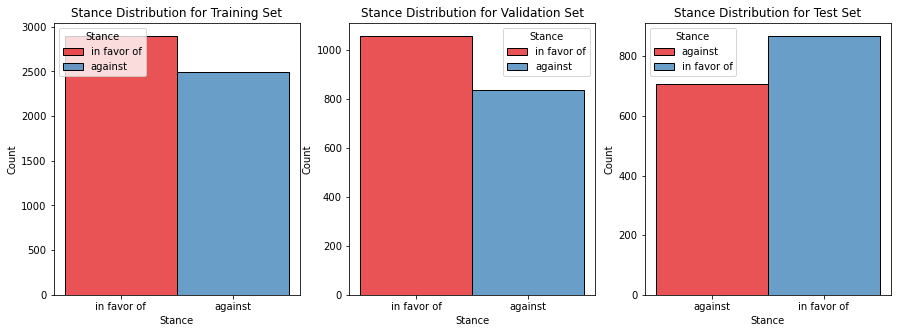

In [8]:
# Plot histograms for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_training, x='Stance', hue='Stance', multiple='stack', palette='Set1', legend=True, shrink=1)
plt.title('Stance Distribution for Training Set')
plt.xlabel('Stance')

plt.subplot(1, 3, 2)
sns.histplot(df_validation, x='Stance', hue='Stance', multiple='stack', palette='Set1', legend=True, shrink=1)
plt.title('Stance Distribution for Validation Set')
plt.xlabel('Stance')

plt.subplot(1, 3, 3)
sns.histplot(df_test, x='Stance', hue='Stance', multiple='stack', palette='Set1', legend=True, shrink=1)
plt.title('Stance Distribution for Test Set')
plt.xlabel('Stance');

Encoding the Stance column

In [6]:
df_training['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)
df_validation['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)
df_test['Stance'].replace({'in favor of': 1, 'against': 0}, inplace=True)

df_training['Stance'] = df_training['Stance'].astype(int)
df_validation['Stance'] = df_validation['Stance'].astype(int)
df_test['Stance'] = df_test['Stance'].astype(int)

df_training.head()

,Conclusion,Stance,Premise,Openess to change,Self-enhancement,Conservation,Self-transcendence
0,We should ban human cloning,1,we should ban human cloning as it will only ca...,0,0,1,0
1,We should ban fast food,1,fast food should be banned because it is reall...,0,0,1,0
2,We should end the use of economic sanctions,0,sometimes economic sanctions are the only thin...,0,1,1,0
3,We should abolish capital punishment,0,capital punishment is sometimes the only optio...,0,0,1,1
4,We should ban factory farming,0,factory farming allows for the production of c...,0,0,1,1


Distribution of Level 3 categories among the data

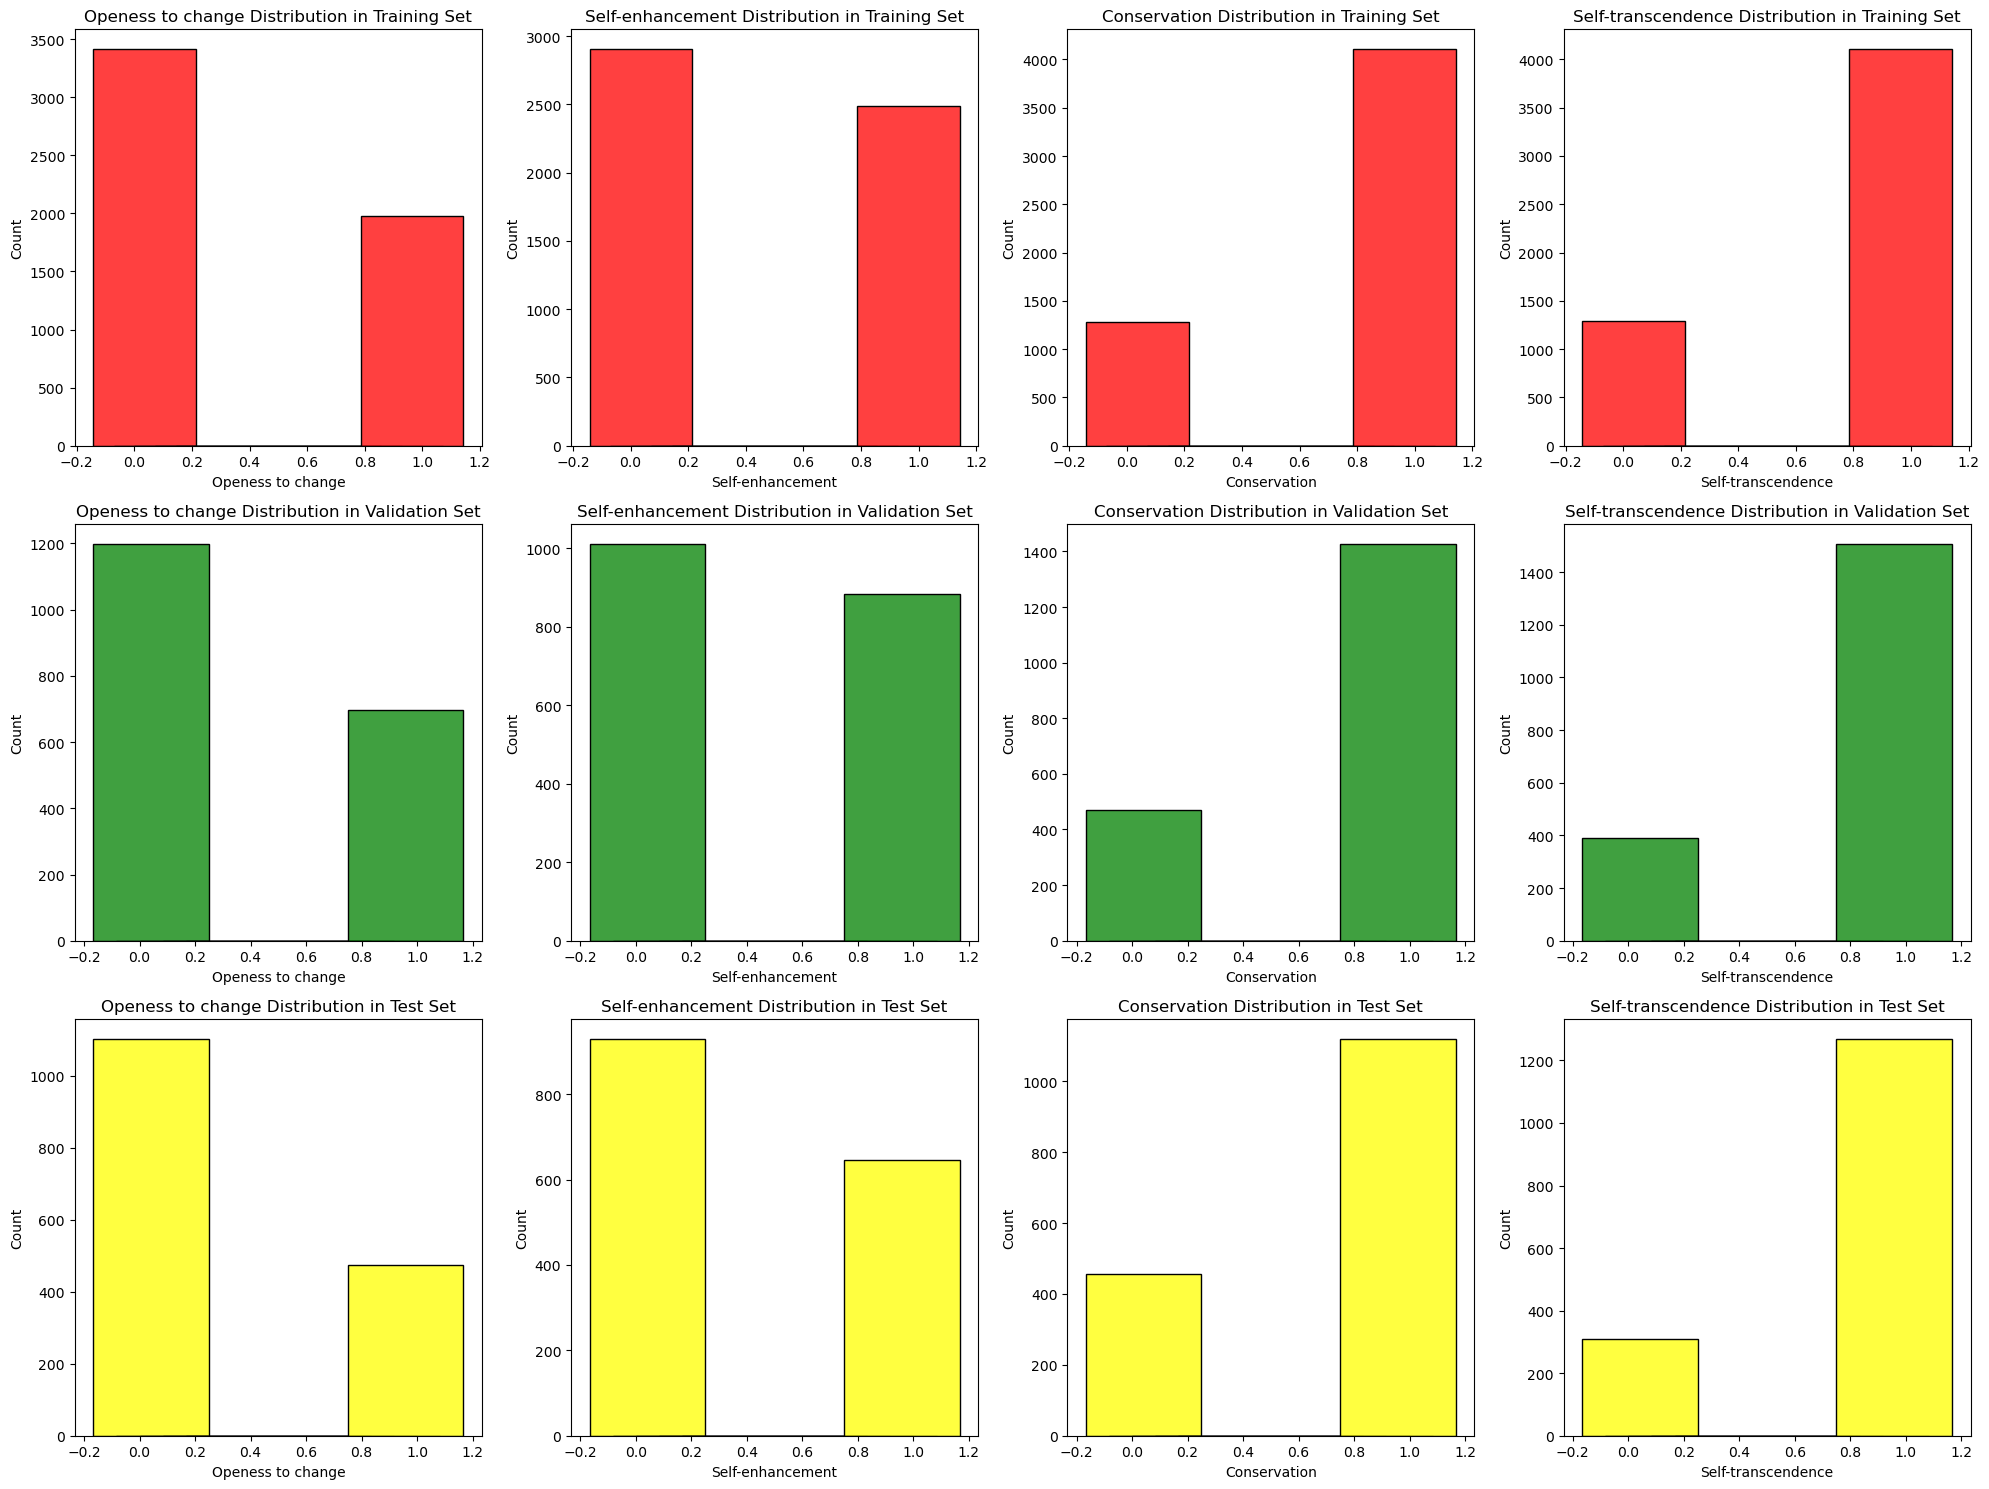

In [7]:
# Plot histograms for the target variables
cols = df_training.columns[-4:]

plt.figure(figsize=(20, 15))

for i, column in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_training[column], kde=False, color='red', shrink=5)
    plt.title(f'{column} Distribution in Training Set')
    plt.xlabel(column)

for i, column in enumerate(cols):
    plt.subplot(3, 4, i + 5)
    sns.histplot(df_validation[column], kde=False, color='green', shrink=5)
    plt.title(f'{column} Distribution in Validation Set')
    plt.xlabel(column)

for i, column in enumerate(cols):
    plt.subplot(3, 4, i + 9)
    sns.histplot(df_test[column], kde=False, color='yellow', shrink=5)
    plt.title(f'{column} Distribution in Test Set')
    plt.xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## TASK 2 - MODEL DEFINITION

#### Pre-processing

In [8]:
#hyperparameters

max_len = 256
batch_size = 16
epochs = 10
learning_rate = 1e-05

In [9]:
import torch
from transformers import AutoTokenizer
from datasets import Dataset
model_name = 'bert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_name)

In [12]:
labels_test = df_test.iloc[:, 3:7].values
labels_training = df_training.iloc[:, 3:7].values
labels_validation = df_validation.iloc[:, 3:7].values

stance_test = df_test['Stance'].values
stance_training = df_training['Stance'].values
stance_validation = df_validation['Stance'].values

ds_test = Dataset.from_pandas(df_test)
ds_training = Dataset.from_pandas(df_training)
ds_validation = Dataset.from_pandas(df_validation)

#### Tokenization of training set

In [11]:
def tokenization(ds, stance, model_type):
    # Initialize lists to store the results
    input_ids = []
    attention_masks = []
    token_type_ids = []
 
    if model_type == 'c':
        c_texts = ds['Conclusion']
        
        for text in c_texts:
            encoded_dict = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=max_len,
                padding='max_length',
                return_token_type_ids=True,
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt'
            )
            input_ids.append(encoded_dict['input_ids'])
            attention_masks.append(encoded_dict['attention_mask'])
            token_type_ids.append(encoded_dict['token_type_ids'])
            
        # Convert lists to tensors
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        token_type_ids = torch.cat(token_type_ids, dim=0)

        # Combine the results into a dictionary
        df_c_inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'token_type_ids': token_type_ids
        }
        return df_c_inputs
    
    elif model_type == 'cp':
        # Extract the list of texts for tokenization of BERT_cp and BERT_cps model inputs
        cp_texts = ds['Conclusion']+[" "]+ds['Premise']

        for text in cp_texts:
            encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens=True,
                        max_length=max_len,
                        padding='max_length',
                        return_token_type_ids=True,
                        truncation=True,
                        return_attention_mask=True,
                        return_tensors='pt'
            )
            input_ids.append(encoded_dict['input_ids'])
            attention_masks.append(encoded_dict['attention_mask'])
            token_type_ids.append(encoded_dict['token_type_ids'])

        # Convert lists to tensors
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        token_type_ids = torch.cat(token_type_ids, dim=0)

        # Combine the results into a dictionary
        df_cp_inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'token_type_ids': token_type_ids
        }
        return df_cp_inputs   
    
    elif model_type == 'cps': 
        # Extract the list of texts for tokenization of BERT_cp and BERT_cps model inputs
        cps_texts = ds['Conclusion']+[" "]+ds['Premise']
        stance = []

        for text in cps_texts:
            encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens=True,
                        max_length=max_len,
                        padding='max_length',
                        return_token_type_ids=True,
                        truncation=True,
                        return_attention_mask=True,
                        return_tensors='pt'
            )
            input_ids.append(encoded_dict['input_ids'])
            attention_masks.append(encoded_dict['attention_mask'])
            token_type_ids.append(encoded_dict['token_type_ids'])

        # Convert lists to tensors
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        token_type_ids = torch.cat(token_type_ids, dim=0)
        stance = torch.tensor(stance)

        # Combine the results into a dictionary
        df_cps_inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'token_type_ids': token_type_ids,
            'stance': stance
        }
        return df_cps_inputs   
        

### Baseline models

In [17]:

def create_random_uniform_classifier(category):
    """
    Creates a random classifier predicting 0 or 1 with uniform probability.

    inputs:
        category: Category to predict
    outputs: 
        a function that generates random predictions
    """
    def random_uniform_classifier(size):
        """
        Generates random uniform predictions for the given category.

        inputs: 
            size: number of predictions to generate
        outputs: 
            array of random uniform predictions
        """
        return np.random.choice([0, 1], size=size)
    
    return random_uniform_classifier


In [18]:
def create_majority_classifier(category, majority_value):
    """
    Creates a majority classifier always predicting the most frequent valorization for the column.

    inputs:
        category: Category to predict
        majority_value: most frequent value (0 or 1)
    outputs:
        a function that generates majority predictions
    """
    def majority_classifier(size):
        """
        Generates majority predictions for the given category.

        inputs: 
            size: number of predictions to generate
        outputs: 
            array of majority predictions
        """
        return np.full(size, majority_value)
    
    return majority_classifier

In [ ]:
classifiers = {}

categories = ['Openess to change', 'Self-enhancement', 'Conservation', 'Self-transcendence']

#create classifiers for each category and save them in the dictionary
for category in categories:
    #random uniform classifier
    random_uniform_name = f'random_uniform_classifier_{category}'
    classifiers[random_uniform_name] = create_random_uniform_classifier(category)

    #majority classifier
    majority_name = f'majority_classifier_{category}'
    classifiers[majority_name] = create_majority_classifier(category, majority_value=1) #da capire perchè majority_value=1

In [21]:
print(classifiers)

{'random_uniform_classifier_Openess to change': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x14b7d05e0>, 'majority_classifier_Openess to change': <function create_majority_classifier.<locals>.majority_classifier at 0x14b7d1260>, 'random_uniform_classifier_Self-enhancement': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x14b7d1300>, 'majority_classifier_Self-enhancement': <function create_majority_classifier.<locals>.majority_classifier at 0x14b7d13a0>, 'random_uniform_classifier_Conservation': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x14b7d1440>, 'majority_classifier_Conservation': <function create_majority_classifier.<locals>.majority_classifier at 0x14b7d14e0>, 'random_uniform_classifier_Self-transcendence': <function create_random_uniform_classifier.<locals>.random_uniform_classifier at 0x14b7d1580>, 'majority_classifier_Self-transcendence': <function create_majority_cl

In [22]:
#Applying the classifiers to the datasets

#iterating over the classifiers
for classifier_name, classifier in classifiers.items():
    #defining the category from the classifier name
    category = classifier_name.split('_')[-1]
    
    #applying the classifier to the test set
    predictions_training = classifier(size=len(df_training))
    prediciions_validation = classifier(size=len(df_validation))
    predictions_test = classifier(size=len(df_test))
    
    #saving the predictions in the test set
    df_training[f'predicted_{classifier_name}'] = predictions_training
    df_validation[f'predicted_{classifier_name}'] = prediciions_validation
    df_test[f'predicted_{classifier_name}'] = predictions_test

#saving the test set with the predictions
print(df_test)

                                             Conclusion  Stance  \
0                      We should end affirmative action       0   
1                      We should end affirmative action       1   
2                             We should ban naturopathy       1   
3                    We should prohibit women in combat       1   
4                             We should ban naturopathy       1   
...                                                 ...     ...   
1571             We should end mass migration together.       1   
1572             We should end mass migration together.       1   
1573  We should consider Russian interests in the EU...       1   
1574  We should adopt an extension of the applicatio...       1   
1575               We should abolish covid digital pass       0   

                                                Premise  Openess to change  \
0      affirmative action helps with employment equity.                  0   
1     affirmative action can be conside

### BERT models

In [11]:
from transformers import AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import EvalPrediction
from torch.utils.data import DataLoader, Dataset
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
import torch

2024-08-04 23:58:07.869331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#array of categories 
categories = ['Openess to change', 'Self-enhancement', 'Conservation', 'Self-transcendence']

id2label = { idx:cat for idx, cat in enumerate(categories)}
label2id = { cat:idx for idx, cat in enumerate(categories)}

In [13]:
class DatasetCreator(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [14]:
train_dataset_c = tokenization(ds_training, stance_training, 'c')
train_dataset_cp = tokenization(ds_training, stance_training, 'cp')
train_dataset_cps = tokenization(ds_training, stance_training, 'cps')

val_dataset_c = tokenization(ds_validation, stance_validation, 'c')
val_dataset_cp = tokenization(ds_validation, stance_validation, 'cp')
val_dataset_cps = tokenization(ds_validation, stance_validation, 'cps')

test_dataset_c = tokenization(ds_test, stance_test, 'c')
test_dataset_cp = tokenization(ds_test, stance_test, 'cp')
test_dataset_cps = tokenization(ds_test, stance_test, 'cps')


In [15]:
tr_dataset_c = DatasetCreator(train_dataset_c, labels_training)
tr_dataset_cp = DatasetCreator(train_dataset_cp, labels_training)
tr_dataset_cps = DatasetCreator(train_dataset_cps, labels_training)

v_dataset_c = DatasetCreator(val_dataset_c, labels_validation)
v_dataset_cp = DatasetCreator(val_dataset_cp, labels_validation)
v_dataset_cps = DatasetCreator(val_dataset_cps, labels_validation)

te_dataset_c = DatasetCreator(test_dataset_c, labels_test)
te_dataset_cp = DatasetCreator(test_dataset_cp, labels_test)
te_dataset_cps = DatasetCreator(test_dataset_cps, labels_test)

In [16]:
train_dataloaderc = DataLoader(tr_dataset_c, batch_size=batch_size)
val_dataloaderc = DataLoader(v_dataset_c, batch_size=batch_size)
test_dataloaderc = DataLoader(te_dataset_c, batch_size=batch_size)

train_dataloadercp = DataLoader(tr_dataset_cp, batch_size=batch_size)
val_dataloadercp = DataLoader(v_dataset_cp, batch_size=batch_size)
test_dataloadercp = DataLoader(te_dataset_cp, batch_size=batch_size)

train_dataloadercps = DataLoader(tr_dataset_cps, batch_size=batch_size)
val_dataloadercps = DataLoader(v_dataset_cps, batch_size=batch_size)
test_dataloadercps = DataLoader(te_dataset_cps, batch_size=batch_size)

In [17]:
model_name = "bert-base-uncased"

#definition of the C_Model class for the first BERT-based model
class C_Model(torch.nn.Module):
    def __init__(self, model_name, id2label, label2id):
        super(C_Model, self).__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            model_name, 
            problem_type='multi_label_classification', 
            num_labels = 4, 
            return_dict=False)
        self.dropout = torch.nn.Dropout(p=0.3)
        self.classifier = torch.nn.Linear(4, 4)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        print(f"Numero di valori restituiti: {len(outputs) if isinstance(outputs, tuple) else 1}")
        print(f"Tipo outputs: {type(outputs)}")
        print("Output: ", outputs[0])
        #print(f"outputs logits: {outputs.logits}")
        outputs = self.dropout(outputs[0])
        #transposed_outputs = torch.transpose(outputs, 0, 1)
        #sequence_output = outputs.logits
        #print(f"Dimensione dell'output del modello BERT: {sequence_output.shape}")
        outputs = self.classifier(outputs)
        return outputs

'''
class roBERTa(torch.nn.Module):
    def __init__(self, model_name):
        super(roBERTa, self).__init__()
        self.roberta = AutoModel.from_pretrained(model_name, return_dict=False)
        self.dropout = torch.nn.Dropout(p=0.3)
        self.classifier = torch.nn.Linear(output_channels, 4)
        
    def forward(self, ids, mask, token_type_ids):
        _, output = self.roberta(ids, attention_mask=mask, token_type_ids=token_type_ids)
        output = self.dropout(output)
        output = self.classifier(output)
        return output
'''

#definition of the CP_Model class for the second BERT-based model
class CP_Model(torch.nn.Module):
    def __init__(self, model_name, id2label, label2id):
        super(CP_Model, self).__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            model_name, 
            problem_type='multi_label_classification', 
            num_labels = 4,
            id2label=id2label,
            label2id=label2id)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 4)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        sequence_output = outputs.logits
        logits = self.classifier(sequence_output)
        return logits


#definition of the CPS_Model class for the third BERT-based model

class CPS_Model(torch.nn.Module):
    def __init__(self, model_name, id2label, label2id):
        super(CPS_Model, self).__init__()
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            model_name, 
            problem_type='multi_label_classification', 
            num_labels = 4,
            id2label=id2label,
            label2id=label2id)
        self.classifier = torch.nn.Linear(16, 4)

    def forward(self, input_ids, attention_mask, token_type_ids, stance):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        sequence_output = outputs.logits
        stance = stance.unsqueeze(1).float() 
        combined_output = torch.cat((sequence_output, stance), dim=1)
        logits = self.classifier(combined_output)
        return logits

In [18]:
c_model = C_Model(model_name, id2label, label2id)
cp_model = CP_Model(model_name, id2label, label2id)
cps_model = CPS_Model(model_name, id2label, label2id)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [233]:
print(c_model)

C_Model(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bia

In [23]:
#definition of the loss function
def loss(outputs, targets):
    return BCEWithLogitsLoss()(outputs, targets)

#definition of the optimizers
optimizer = Adam(c_model.parameters(), lr = 1e-5)

MI SONO BASATA SUL NOTEBOOK CHE TROVI A QUESTO LINK: 

https://github.com/dtolk/multilabel-BERT/blob/master/notebooks/multi_class_text_classification_BERT.

 (NON STESSO PROBLEMA, MA COMUNQUE MULTI-LABEL CLASSIFICATION)

## TASK 3 - METRICS

In [124]:
from sklearn.metrics import f1_score

In [125]:
#defining per-category F1 score metric
def calculate_per_category_f1(y_true, y_pred):
    categories = ['Openess to change', 'Self-enhancement', 'Conservation', 'Self-transcendence']
    category_f1_scores = {}
    for category in categories:
        # Filter true and predicted labels for the current category
        category_indices = [i for i, cat in enumerate(y_true['category']) if cat == category]
        category_y_true = [y_true['Stance'][i] for i in category_indices]
        category_y_pred = [y_pred[i] for i in category_indices]
        
        # Calculate F1 score for the current category
        f1 = f1_score(category_y_true, category_y_pred, average='binary')
        category_f1_scores[category] = f1
    return category_f1_scores

#defining macro F1 score metric
def calculate_macro_f1(category_f1_scores):
    average_f1 = np.mean(list(category_f1_scores.values()))
    return average_f1

#defining the EvalPrediction object for Trainer
def calculate_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    labels = p.label_ids
    
    # F1 score per category
    category_f1_scores = calculate_per_category_f1(labels, preds)
    
    # F1 score macro
    macro_f1 = calculate_macro_f1(category_f1_scores)
    
    #results
    result = {
        'category_f1_scores': category_f1_scores,
        'macro_f1': macro_f1
    }
    
    return result

## TASK 4 - TRAINING AND EVALUATION

In [21]:
def trainBert(model, dataloader, optimizer, loss):
    size = len(dataloader.dataset)
    model.train()
    for batch, data in enumerate(dataloader, 1):
        ids = data['input_ids'].to(dtype=torch.long)
        mask = data['attention_mask'].to(dtype=torch.long)
        token_type_ids = data['token_type_ids'].to(dtype=torch.long)
        labels = data['labels'].to(dtype=torch.float)
        optimizer.zero_grad()
        if model == cps_model:
            stance = data['stance'].to(dtype=torch.float)
            outputs = model(ids, mask, token_type_ids, stance)
        else:
            outputs = model(ids, mask, token_type_ids)
            
        loss = loss(outputs, labels)

        
        loss.backward()
        optimizer.step()
  
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(ids)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [151]:
# Set seeds for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

seeds = [42, 123, 2024]
#seeds = [456]

In [24]:
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    trainBert(c_model, train_dataloaderc, optimizer, loss)

Epoch 1
-------------------------------


/var/folders/m8/7w492cy56wj0kv_2fglfp_1m0000gn/T/ipykernel_25466/3437902226.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Numero di valori restituiti: 1
Tipo outputs: <class 'tuple'>
Output:  tensor([[ 0.2858,  0.5393,  0.3116, -0.0064],
        [ 0.2826,  0.6304,  0.1855, -0.1764],
        [ 0.3683,  0.5685,  0.1506, -0.0824],
        [ 0.1940,  0.6501,  0.1289, -0.0923],
        [ 0.1388,  0.4651,  0.2994, -0.0649],
        [ 0.2110,  0.5937,  0.1628, -0.2250],
        [ 0.2734,  0.7367,  0.1744, -0.1019],
        [ 0.4450,  0.4603,  0.3228, -0.2197],
        [ 0.1546,  0.4487,  0.3524, -0.0330],
        [ 0.3870,  0.5218,  0.4008,  0.0021],
        [ 0.1162,  0.9405, -0.1025, -0.4349],
        [ 0.1952,  0.6349,  0.1464, -0.0491],
        [ 0.2966,  0.4964,  0.4002, -0.0100],
        [ 0.2423,  0.7343,  0.2123, -0.0775],
        [ 0.2611,  0.3266,  0.1959, -0.0525],
        [ 0.3536,  0.6581,  0.1182, -0.2898]], grad_fn=<AddmmBackward0>)
Numero di valori restituiti: 1
Tipo outputs: <class 'tuple'>
Output:  tensor([[ 0.3221,  0.4872,  0.2119, -0.0163],
        [ 0.3626,  0.6573,  0.0849, -0.0435],
     

TypeError: 'Tensor' object is not callable